# FIRST ORDER MODEL FOR PROPOSED ENFIELD BUILDING

In [1]:
import pandas as pd
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt

In [44]:
class Person:
    """
    A class that represents a person at the food pantry.
    """
    # ATTRIBUTES:
    # Attribute order: the order the person visits the pressure points in the food pantry
    # Invariant: order is a list of Pressure_Points
    #
    # Attribute available: whether or not the person is available to go to the next station
    # Invariant: available is a boolean value
    #
    # Attribute enter: the time the person enters the food pantry
    # Invariant: enter is a positive int
    #
    # Attribute leave: the time the person leaves the food pantry
    # Invariant: leave is a positive int
    #
    # Attribute shopping_time: the total time spent shopping
    # Invariant: shopping_time is an int which is the sum of each Pressure_Point.time in self.order
    
    
    
    def __init__(self, model):
        """
        Initializes a Person object entering Model model.
        """
        self.order = model.pressure_points.copy()
        
        # Randomly chooses whether person goes to each station based on Pressure_Point.p
        i=0
        while i < len(self.order):
            if np.random.uniform() > self.order[i].p:
                self.order.pop(i)
            else:
                i += 1
#         random.shuffle(self.order)

        # forces "load car" to be the LAST station visited 
        copy = self.order[-1:]
        random.shuffle(copy)
        self.order[-1:] = copy
        
        # Set total time spent shopping
        self.shopping_time = 0
        
        # Set remaining attributes
        self.enter = model.iterations
        self.available = True
        self.leave = -1 #set this to -1 to indicate they haven't left yet
        
    def setLeave(self, iterations):
        """
        Sets the time the person leaves the food pantry.
        """
        self.leave = iterations
        
    def __str__(self):
        """
        Returns a string representing the person. i.e. the stations the person has to visit
        """
        str = "Stations remaining: "
        for i in self.order:
            str += ", " + i.name
        return str
    
class Car: #STILL IN PROGRESS
    """
    A class that represents a car at the food pantry parking lot.
    """
    # ATTRIBUTES:
    # Attribute parked: binary if car is parked or not
    # Invariant: parked is True or False 
    
    def __init__(self, model):
        """
        Initializes a Car object entering Model model.
        """
        self.parked = False;
        self.riders = []
        for i in range(model.per_car):
            #create per_car number of people to go in this car
            self.riders.append(Person(model))
            
    def getRidersDone(self):
        """
        Returns a boolean stating if all of the riders in this car have completed all of their tasks
        """
        riders_done = 0
        for i in self.riders:
            if (len(i.order)==0 and i.available):
                riders_done += 1
        if(riders_done == per_car):
            return True
        else: 
            return False
        
    def __str__(self):
        """
        Returns a string representing the person. i.e. the stations the person has to visit
        """
        str = "car"
        return str
        
                
        
#     def setPark(self, p):
#         """
#         Sets whether car is parked or not.
#         """
#         self.parked = p
        
    
class Pressure_Point:
    """
    A class that represents a pressure point in the food pantry.
    """
    # ATTRIBUTES:
    # Attribute name: the name of the pressure point
    # Invariant: name is a string
    #
    # Attribute capacity: the number of people that can shop at the pressure point at a time
    # Invariant: capacity is an int >= 0
    #
    # Attribute time: the time people spend at the pressure point
    # Invariant: time is an int >= 1
    #
    # Attribute atCapacity: whether or not the pressure point is full
    # Invariant: atCapacity is a boolean value
    #
    # Attribute people: the people shopping at the pressure point
    # Invariant: people is a list of People objects
    #
    # Attribute timeRemaining: the time each person in self.people has remaining at the pressure point
    # Invariant: timeRemaining is a list of ints >= 0 with the same length as self.people
    #
    # Attribute p: the probability a person shops at this pressure point
    # Invariant: p is an int or float between 0 and 1
    
    
    
    def __init__(self, name, capacity, time, p = 1):
        """
        Initializes a Pressure_Point object.
        """
        self.name = name
        self.capacity = capacity
        self.time = time
        self.atCapacity = False
        self.people = []
        self.timeRemaining = []
        self.p = p
        
        
    def update(self):
        """
        Updates attributes of the Pressure_Point after one minute has passed.
        """
        i = 0
        while i < len(self.timeRemaining):
            self.timeRemaining[i] -= 1
            if self.timeRemaining[i] < 0:
                self.timeRemaining.pop(i)
                self.people[i].available = True
                self.people.pop(i)
                self.atCapacity = False
            else:
                i += 1
            
    def add(self, person):
        """
        Attempts to add Person person to shop at this Pressure_Point.
        """
        # Checks if full
        if not self.atCapacity:
            person.available = False
            self.people.append(person)
            t = int(np.random.exponential(self.time))
            self.timeRemaining.append(t)
            person.shopping_time += t
            person.order.pop(0)
            if len(self.people) == self.capacity:
                self.atCapacity = True
    
    def __str__(self):
        """
        Returns a string representing this pressure point. 
        i.e. how much time each person at the pressure point has left to shop.
        """
        #return "Number of People: " + str(len(self.people))
        return "Time Remaining: " + str(self.timeRemaining)

class Model:
    """
    A class that represents a simulation model.
    """
    # ATTRIBUTES:
    # Attribute cars: the number of cars that arrive at the food pantry daily
    # Invariant: cars is an int or float >= 0
    #
    # Attribute per_car: the number of adults in each car
    # Invariant: per_car is an int > 0
    #
    # Attribute parking_lot: list of cars in the parking lot
    # Invariant: parking_lot is a list, make sure it does not exceed size parking_spots
    #
    # Attribute parking_spots: maxmimum number of cars that can park in lot at once
    # Invariant: parking_spots is an int >= 0
    #
    # Attribute parking_queue: a queue of cars that have arrived but cannot park
    # Invariant: parking_queue is an queue > 0
    #
    # Attribute hours_open: the number of hours open per day
    # Invariant: hours_open is an int or float >= 0
    #
    # Attribute arrival_rate: the number of cars that arrive at the food pantry per minute
    # Invariant: arrival_rate is an int or float >= 0
    #
    # Attribute pressure_points: the pressure_points in the food pantry
    # Invariant: pressure_points is a list of Pressure_Point objects
    #
    # Attribute iterations: how many minutes have been simulated in the model
    # Invariant: iterations is an int >= 0
    #
    # Attribute people: the people currently in the food pantry
    # Invariant: people is a list of People objects
    #
    # Attribute arrival_count: the amount of people that should have shown up since the last person
    # Invariant: arrival_count is an int or float >= 0
    #
    # Attribute people_arrived: the amount of people who arrived on the current day and entered the building
    # Invariant: people_arrived is an int >= 0
    #
    # Attribute people_arrived_car: the amount of people who arrived on the current day via car, may not have entered building
    # Invariant: people_arrived_car is an int >= 0
    #
    # Attribute cars_arrived: the amount of cars who arrived on the current day
    # Invariant: cars_arrived is an int >= 0
    #
    # Attribute parking_queue_length: the amount of cars in the parking queue
    # Invariant: parking_queue_length is an int >= 0
    #
    # Attribute day: the current day being simulated
    # Invariant: day is an int >= 0
    #
    # Attribute stats: the data collected from simulating
    # Invariant: stats is a list of pandas DataFrames
    #
    # Attribute arrival_stats: the amount of people who arrived on each day
    # Invariant: arrival_stats is a list of ints >= 0
    #
    # Attribute car_arrival_stats: the amount of cars that arrived on each day
    # Invariant: car_arrival_stats is a list of ints >= 0
    #
    # Attribute people_df: the people stats for the current day
    # Invariant: people_df is a pandas DataFrame
    #
    # Attribute flow_df: the flow stats for current day
    # Invariant: flow_df is a pandas DataFrame
    
    
    
    def setPressurePoints(self, names, times, capacities, ps):
        """
        Initializes self.pressure_points.
        """
        assert len(names) == len(times)
        assert len(names) == len(capacities)
        
        self.pressure_points = []
        
        for i in range(len(names)):
            self.pressure_points.append(Pressure_Point(names[i], capacities[i], times[i], ps[i]))
    
    
    def __init__(self, cars, per_car, parking_spots, hours_open, names, times, capacities, ps):
        """
        Initializes an instance of a model.
        """
        self.cars = cars
        self.per_car = per_car
        self.parking_spots = parking_spots
        self.parking_lot = [] #added parking lot list, manually need to make sure it doesn't go over parking_spots
        self.parking_queue = deque() #added empty queue for parking
        self.arrival_rate = cars / (hours_open * 60)
        self.hours_open = hours_open
        self.setPressurePoints(names, times, capacities, ps)
        self.iterations = 0
        self.people = []
        self.arrival_count = 0
        self.people_arrived = 0
        self.cars_arrived = 0
        self.parking_queue_length = 0
        self.people_arrived_car = 0 #added to count total number of ppl who arrived, but may not have gotten into building
        self.day = 0
        self.stats = []
        self.arrival_stats = []
        self.people_df = pd.DataFrame(columns = ['day', 'enter', 'leave', 'total_time', 'shopping_time', 'waiting_time'])
        self.flow_df = pd.DataFrame(columns = ['day', 'minute', 'number_of_people', 'parking lot', 'parking queue'])
        
        
    def iterate(self):
        """
        Performs the actions of one minute in the food pantry.
        """
        self.iterations += 1
        # self.arrival_count += self.arrival_rate # use this for if arrival rate is constant
        self.arrival_count += np.random.poisson(self.arrival_rate) # use this for is arrival rate is poisson
        
        # Simulate cars arriving
        while self.arrival_count >= 1:
            # add car to parking queue
            current_car = Car(self)
            self.parking_queue.append(current_car)
            self.cars_arrived += 1
            self.arrival_count -= 1
            for rider in current_car.riders:
                self.people_arrived_car += 1
#             print('car was added to queue')
            
            
        # If there are open parking spots, let people in queue park
        while len(self.parking_lot)<self.parking_spots and len(self.parking_queue)>0:
            queue_car = self.parking_queue.popleft()
            self.parking_lot.append(queue_car)
            for rider in queue_car.riders:
                self.people.append(rider) #add rider to people lsit
                self.people_arrived += 1 # increase number of people at the store 
#             print('car was able to park')
        self.parking_queue_length += len(self.parking_queue)
        
        # Update each Pressure_Point
        for i in self.pressure_points:
            i.update()
        
        # Simulate people leaving and shopping at each Pressure_Point and collect data
        i = 0
        while i < len(self.people):
            if len(self.people[i].order) == 0 and self.people[i].available:
                self.people[i].setLeave(self.iterations)
                self.people_df.loc[len(self.people_df.index)] = [self.day, self.people[i].enter - (60 * self.hours_open * (self.day - 1)), 
                                                                 self.people[i].leave - (60 * self.hours_open * (self.day - 1)), 
                                                           self.people[i].leave - self.people[i].enter,
                                                           self.people[i].shopping_time, 
                                                           self.people[i].leave - self.people[i].enter - self.people[i].shopping_time]
                self.people.pop(i) 
            else:
                if self.people[i].available:
                    self.people[i].order[0].add(self.people[i])
                i += 1
        for cars in self.parking_lot:
            if(cars.getRidersDone()):
                self.parking_lot.remove(cars)
#                 print('CAR HAS BEEN REMOVED')
        
        self.flow_df.loc[len(self.flow_df.index)] = [self.day, self.iterations - (60 * self.hours_open * (self.day - 1)), len(self.people), len(self.parking_lot), len(self.parking_queue)]
        # Print the state of the model
#         self.print_state()
                
            
    def simulate_day(self):
        """
        Runs simulation for one day.
        """
        self.day += 1
        i = 0
        self.arrival_count = 0
        self.people_arrived = 0
        self.people_arrived_car = 0
        self.cars_arrived = 0
        self.parking_queue_length = 0
        self.parking_lot = []
        self.parking_queue = deque()
        self.people = []
        self.people_df = pd.DataFrame(columns = ['day', 'enter', 'leave', 'total_time', 'shopping_time', 'waiting_time'])
        self.flow_df = pd.DataFrame(columns = ['day', 'minute', 'number_of_people', 'parking lot', 'parking queue'])
        while i < self.hours_open * 60:
            i += 1
            self.iterate()
        self.stats.append([self.people_df, self.flow_df])
        self.arrival_stats.append([self.people_arrived,
                                   self.people_arrived_car,
                                   self.cars_arrived,
                                   self.parking_queue_length/(self.hours_open * 60)])
        
        
    def print_state(self):
        """
        Prints the current state of the model.
        """
        print('TIME: ', self.iterations)
        print("PARKING LOT:", len(self.parking_lot))
#         for i in self.parking_lot:
#             print(str(i))
        print("PARKING QUEUE:", len(self.parking_queue))
#         for i in self.parking_queue:
#             print(str(i))
        print("PEOPLE:")
        for i in self.people:
            print(str(i))
        print("PRESSURE POINTS:")
        for i in self.pressure_points:
            print(str(i))
        print("--------")
                
                
    def simulate(self, days):
        """
        Runs the simulation for days days.
        """
        for i in range(days):
            self.simulate_day()

In [24]:
# Initialize the model with given data from Enfield
cars = 100
per_car = 2
parking_spots = 20
hours_open = 3
names = ["rescued produce", "assorted meats", "baked goods", "clothes", "load car"]
times = [5, 5, 5, 10, 4]
capacities = [3, 3, 3, 7, 1000] # capacity for loading car should be infinite since (assume less than 1000 shoppers at a time)
ps = [1, 1, 1, .25, 1]
enfield = Model(cars, per_car, parking_spots, hours_open, names, times, capacities, ps)

In [25]:
# Run the simulation for 14 days
enfield.simulate(1)

In [26]:
# Collect aggregate data in one DataFrame
df = pd.DataFrame(columns = ['day',
                             'shoppers_served',
                             'shoppers_arrived',
                             'people_arrived',
                             'cars_arrived',
                             'avg_parking_queue',
                             'avg_total_time',
                             'avg_shopping_time',
                             'avg_waiting_time'])

for i in range(len(enfield.stats)):
    df.loc[i] = [int(enfield.stats[i][0]['day'][0]),
                             len(enfield.stats[i][0].index),
                             enfield.arrival_stats[i][0],
                             enfield.arrival_stats[i][1],
                             enfield.arrival_stats[i][2],
                             enfield.arrival_stats[i][3],
                             enfield.stats[i][0]['total_time'].mean(),
                             enfield.stats[i][0]['shopping_time'].mean(),
                             enfield.stats[i][0]['waiting_time'].mean()]
df

,day,shoppers_served,shoppers_arrived,people_arrived,cars_arrived,avg_parking_queue,avg_total_time,avg_shopping_time,avg_waiting_time
0,1.0,60.0,98.0,218.0,109.0,22.3,70.083333,20.616667,49.466667


In [30]:
enfield.stats[0][0]

,day,enter,leave,total_time,shopping_time,waiting_time
0,1,1,11,10,4,6
1,1,1,25,24,20,4
2,1,1,42,41,36,5
3,1,4,45,41,34,7
4,1,1,46,45,41,4
5,1,4,48,44,40,4
6,1,10,56,46,28,18
7,1,15,56,41,16,25
8,1,5,58,53,32,21
9,1,5,58,53,23,30


In [31]:
enfield.stats[0][1]

,day,minute,number_of_people,parking lot,parking queue
0,1,1,4,2,0
1,1,2,4,2,0
2,1,3,4,2,0
3,1,4,6,3,0
4,1,5,8,4,0
...,...,...,...,...,...
175,1,176,39,20,60
176,1,177,39,20,60
177,1,178,37,19,61
178,1,179,39,20,60


# function to plot shoppers in store for 1 day

In [32]:
def shoppers_in_store(enfield):
    """
    who_is_in_store_d1 = pd.DataFrame(columns=["time", 'number_of_shoppers'])
    for j in range(enfield.hours_open*60): #adds shoppers in store based on their arrival and leaving times... but only people that COMPLETED their trip
        in_store_count = 0
        for i in range(len(daily_df_day1)):
            if(daily_df_day1.loc[i]['enter']<=j and daily_df_day1.loc[i]['leave']>j):
                in_store_count = in_store_count+1
        who_is_in_store_d1.loc[j] = [j, in_store_count]
    not_counted = [] #list of when shoppers who didn't finish ARRIVED
    for i in enfield.people:
        not_counted.append(i.enter)
    for n in not_counted:
        for j in range(n, enfield.hours_open*60):
            who_is_in_store_d1.loc[j]['number_of_shoppers'] = who_is_in_store_d1.loc[j]['number_of_shoppers'] + 1
    who_is_in_store_d1.plot(y='number_of_shoppers', use_index=True)
    """
    plt.plot(enfield.stats[0][1]['number_of_people'])
    plt.title('Number of shoppers in a day with ' + str(enfield.cars) +' cars and ' + str(enfield.parking_spots) +' parking spots')
    plt.xlabel("Time (minutes)")
    plt.ylabel("Number of shoppers inside building")

    plt.show()

# function to plot parking lot and queue for 1 day

In [35]:
import seaborn as sns

def parking_plot(model):
    x = model.stats[0][1]['minute']
    y0 = model.stats[0][1]['parking lot']
    y1 = model.stats[0][1]['parking queue']

    plt.plot(x, y0, 'r')
    plt.plot(x, y1, 'b') 
    plt.legend(['parking lot', 'parking queue'])
    plt.xlabel("Time (minutes)")
    plt.ylabel("Number of cars")
    plt.title("Number of cars in lot and queue with " + str(model.cars) + " cars and " + str(model.parking_spots) + " parking spots")
    
    plt.show()
    

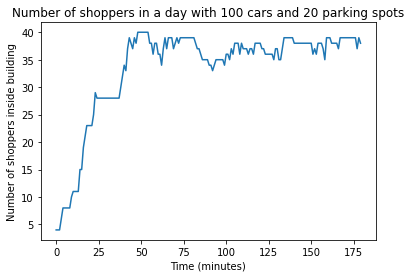

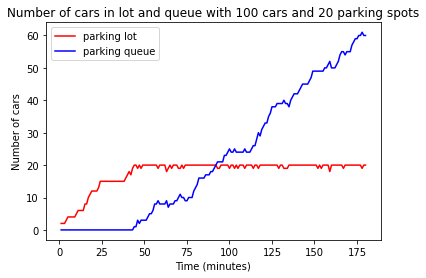

In [36]:
shoppers_in_store(enfield)
parking_plot(enfield)

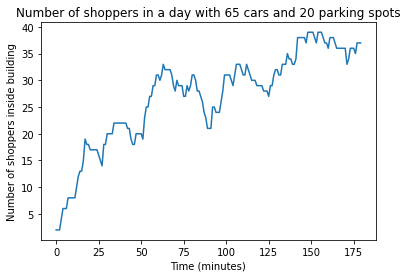

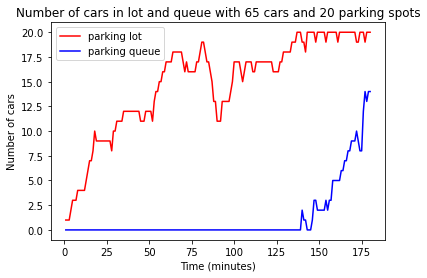

In [38]:
#change model attributes slightly
new_cars = 65
enfield_65 = Model(new_cars, per_car, parking_spots, hours_open, names, times, capacities, ps)
enfield_65.simulate(1)
shoppers_in_store(enfield_65)
parking_plot(enfield_65)

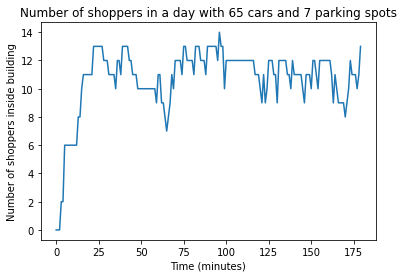

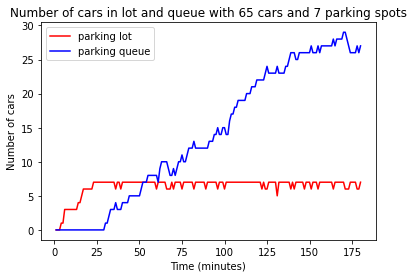

In [39]:
new_parking_spots = 7
enfield_65_7 = Model(new_cars, per_car, new_parking_spots, hours_open, names, times, capacities, ps)
enfield_65_7.simulate(1)
shoppers_in_store(enfield_65_7)
parking_plot(enfield_65_7)

# Final Report Visualizations:

### Visualization 1 (Jack)

In [106]:
# Initialize the model with given data from Enfield
cars = 65
per_car = 2
parking_spots = 20
hours_open = 3
names = ["rescued produce", "assorted meats", "baked goods", "clothes", "load car"]
times = [5, 5, 5, 10, 4]
capacities = [3, 3, 3, 7, 1000] # capacity for loading car should be infinite since (assume less than 1000 shoppers at a time)
ps = [1, 1, 1, .25, 1]
enfield = Model(cars, per_car, parking_spots, hours_open, names, times, capacities, ps)

In [107]:
enfield.simulate(14)

In [108]:
enfield.stats[0][0].head()

,day,enter,leave,total_time,shopping_time,waiting_time
0,1,2,16,14,10,4
1,1,2,21,19,14,5
2,1,2,23,21,17,4
3,1,5,24,19,11,8
4,1,4,27,23,13,10


In [109]:
enfield.stats[1][0].head()

,day,enter,leave,total_time,shopping_time,waiting_time
0,2,2,17,15,11,4
1,2,2,24,22,16,6
2,2,9,29,20,16,4
3,2,9,38,29,25,4
4,2,12,40,28,20,8


In [110]:
def avg_stats(model):
    avg_people_df = pd.DataFrame(columns = ['days',
                             'avg_shoppers_served',
                             'avg_shoppers_arrived',
                             'avg_people_arrived',
                             'avg_cars_arrived',
                             'avg_parking_queue',
                             'avg_total_time',
                             'avg_shopping_time',
                             'avg_waiting_time'])
    people_dfs = model.stats[0][0]
    for i in model.stats[1:]:
        people_dfs = pd.concat([people_dfs, i[0]])
    stats = np.array(model.arrival_stats)                         
    avg_people_df.loc[0] = [len(model.stats),
                            len(people_dfs.index)/len(model.stats),
                            stats[:, 0].mean(),
                            stats[:, 1].mean(),
                            stats[:, 2].mean(),
                            stats[:, 3].mean(),
                            people_dfs['total_time'].mean(),
                            people_dfs['shopping_time'].mean(),
                            people_dfs['waiting_time'].mean()]
    
    flow_dfs = model.stats[0][1].set_index('minute')
    for i in model.stats[1:]:
        flow_dfs = pd.concat([flow_dfs, i[1]])
    avg_flow_dfs = flow_dfs.groupby('minute').sum()[['number_of_people', 'parking lot', 'parking queue']]/len(model.stats)
    return round(avg_people_df, 2), round(avg_flow_dfs, 2)
avg_stats(enfield)[0]

,days,avg_shoppers_served,avg_shoppers_arrived,avg_people_arrived,avg_cars_arrived,avg_parking_queue,avg_total_time,avg_shopping_time,avg_waiting_time
0,14.0,66.79,104.14,129.14,64.57,4.41,54.92,19.45,35.47


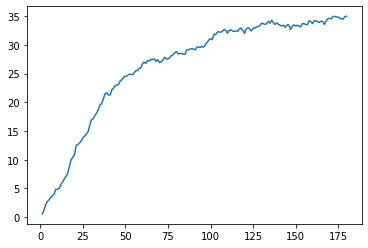

In [111]:
plt.plot(avg_stats(enfield)[1]['number_of_people'])

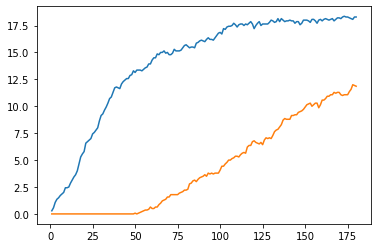

In [112]:
plt.plot(avg_stats(enfield)[1]['parking lot'])
plt.plot(avg_stats(enfield)[1]['parking queue'])

These visualizations show the average number of people in the food pantry at each minute during the day as well as the average number of cars in the parking lot and the parking queue at each time in the day